<a href="https://colab.research.google.com/github/dtsri/insightflare/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the required packages**

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading and Exploring the data**

In [154]:
netflix = pd.read_csv('/content/Netflix subscription fee Dec-2021.csv') #reading the data

In [155]:
netflix.head() #viewing the data

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [156]:
netflix.columns

Index(['Country_code', 'Country', 'Total Library Size', 'No. of TV Shows',
       'No. of Movies', 'Cost Per Month - Basic ($)',
       'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)'],
      dtype='object')

In [157]:
#shape of the data
netflix.shape

(65, 8)

In [158]:
#describe function
netflix.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000


In [159]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.2+ KB


In [160]:
netflix.isnull().sum() #checking for nulls

,0
Country_code,0
Country,0
Total Library Size,0
No. of TV Shows,0
No. of Movies,0
Cost Per Month - Basic ($),0
Cost Per Month - Standard ($),0
Cost Per Month - Premium ($),0


In [161]:
netflix.duplicated().sum() #checking for duplicates

np.int64(0)

**Exploratory data analysis**

In [162]:
#as there are no null or duplicates, starting eda process

**Top Countries with largest library size**

In [163]:
# Top 10 Countries with largest netflix library size
top_country_by_libary_size = netflix.sort_values(by = 'Total Library Size', ascending = False).head(10)

In [164]:
top_country_by_libary_size

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
12,cz,Czechia,7325,5234,2091,8.83,11.49,14.15
51,sk,Slovakia,7035,5055,1980,9.03,11.29,13.54
24,hu,Hungary,6884,4802,2082,7.64,10.71,13.78
6,bg,Bulgaria,6797,4819,1978,9.03,11.29,13.54
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48
28,ie,Ireland,6486,4515,1971,9.03,14.67,20.32
34,lt,Lithuania,6462,4490,1972,9.03,11.29,13.54
15,ee,Estonia,6456,4486,1970,9.03,11.29,13.54
32,lv,Latvia,6450,4479,1971,9.03,11.29,13.54
25,is,Iceland,6387,4426,1961,9.03,14.67,20.32


<Axes: xlabel='Country'>

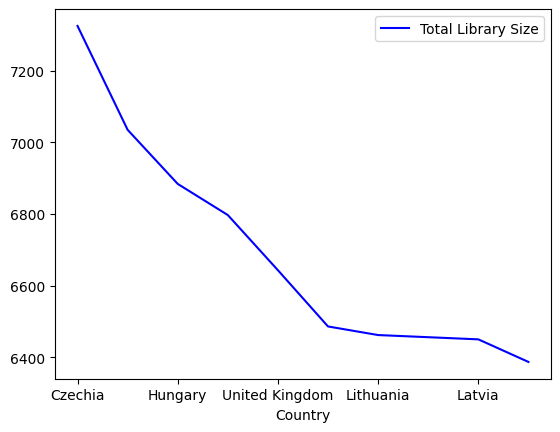

In [234]:
#plotting top_country_by_library_size using Total_Cost_Of_All_PLans, counrty, total library size
top_country_by_libary_size.plot(kind = 'line', x = 'Country', y = 'Total Library Size', color = 'blue')

**Total Cost of All Plans**

In [166]:
# adding cost per month basic, standard and premium together to get column as total cost of all plans
total_cost_allplans = netflix['Cost Per Month - Basic ($)'] + netflix['Cost Per Month - Standard ($)'] + netflix['Cost Per Month - Premium ($)']

In [167]:
total_cost_allplans

,0
0,19.30
1,36.35
2,44.02
3,45.72
4,32.97
...,...
60,25.39
61,39.59
62,40.97
63,37.97


In [168]:
#adding the column name to total_cost_allplans
netflix['Total_Cost_Of_All_Plans'] =   total_cost_allplans

In [169]:
netflix['Total_Cost_Of_All_Plans']

,Total_Cost_Of_All_Plans
0,19.30
1,36.35
2,44.02
3,45.72
4,32.97
...,...
60,25.39
61,39.59
62,40.97
63,37.97


#### **Which countries have most expensive and most cheapest netflix overall**

In [170]:
# sorting the total cost plans
# since the largest library size is not affecting the total cost of the plans of customers
top_expensive = netflix.sort_values(by = 'Total_Cost_Of_All_Plans', ascending = False).head(10)

In [171]:
top_expensive

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Total_Cost_Of_All_Plans
56,ch,Switzerland,5506,3654,1852,12.88,20.46,26.96,60.30
33,li,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,60.30
13,dk,Denmark,4558,2978,1580,12.00,15.04,19.60,46.64
17,fr,France,5445,3604,1841,10.16,15.24,20.32,45.72
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,45.72
29,il,Israel,5713,3650,2063,10.56,15.05,19.54,45.15
55,se,Sweden,4361,2973,1388,10.90,14.20,19.70,44.80
30,it,Italy,5183,3545,1638,9.03,14.67,20.32,44.02
18,de,Germany,5668,3814,1854,9.03,14.67,20.32,44.02
49,sm,San Marino,2310,1937,373,9.03,14.67,20.32,44.02


In [172]:
print("Top 10 Most Expensive Countries:\n")
print(top_expensive[['Country', 'Total_Cost_Of_All_Plans']])

Top 10 Most Expensive Countries:

          Country  Total_Cost_Of_All_Plans
56    Switzerland                    60.30
33  Liechtenstein                    60.30
13        Denmark                    46.64
17         France                    45.72
3         Belgium                    45.72
29         Israel                    45.15
55         Sweden                    44.80
30          Italy                    44.02
18        Germany                    44.02
49     San Marino                    44.02


<Axes: xlabel='Country'>

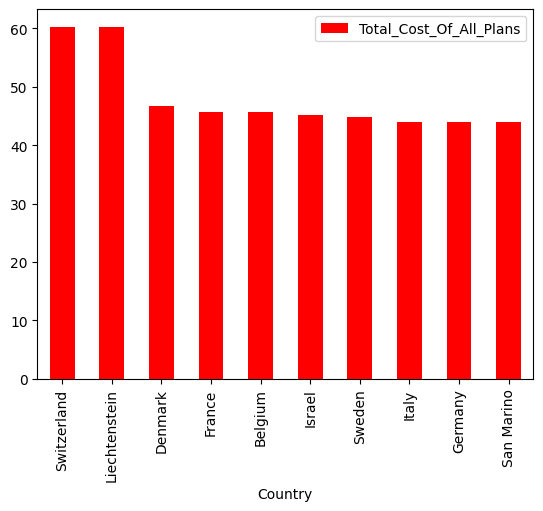

In [173]:
#plotting the top_expensive
top_expensive.plot(kind = 'bar', x = 'Country', y = 'Total_Cost_Of_All_Plans', color = 'red')

In [174]:
#switzerland is the top expensive country and maybe cause - It has one of the highest costs of living in the world
# Strong currency (Swiss Franc), Heavy VAT/digital taxes, Netflix assumes users here are wealthy.

In [175]:
top_cheapest = netflix.sort_values(by = 'Total_Cost_Of_All_Plans', ascending = True).head(10)

In [176]:
top_cheapest

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Total_Cost_Of_All_Plans
59,tr,Turkey,4639,2930,1709,1.97,3.00,4.02,8.99
26,in,India,5843,3718,2125,2.64,6.61,8.60,17.85
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,19.30
9,co,Colombia,4991,3156,1835,4.31,6.86,9.93,21.10
5,br,Brazil,4972,3162,1810,4.61,7.11,9.96,21.68
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29,25.39
43,pe,Peru,4986,3155,1831,6.11,8.56,11.01,25.68
44,ph,Philippines,6362,4154,2208,7.35,9.14,10.93,27.42
52,za,South Africa,5736,3686,2050,6.26,10.05,12.58,28.89
8,cl,Chile,4994,3156,1838,7.07,9.91,12.74,29.72


<Axes: xlabel='Country'>

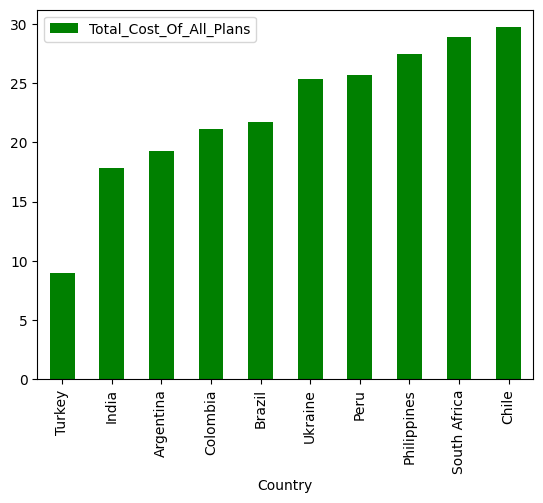

In [177]:
top_cheapest.plot(kind = 'bar', x = 'Country', y = 'Total_Cost_Of_All_Plans', color = 'green')

In [178]:
# turkey is the top cheapest maybe cause - Massive currency devaluation (Turkish Lira lost value rapidly)
# Netflix adjusts prices to match the economy and retain users

#### **Which countries are getting best value for standard price plan**

In [179]:
#comparing prices across all countries by selecting a standard plan
netflix['Standard_Priceplan'] = netflix['Cost Per Month - Standard ($)'] / netflix['Total Library Size']

In [180]:
netflix['Standard_Priceplan'] #value comparison

,Standard_Priceplan
0,0.001324
1,0.001982
2,0.002601
3,0.003054
4,0.002202
...,...
60,0.001585
61,0.001987
62,0.002405
63,0.002604


In [181]:
#total count/sum
netflix['Standard_Priceplan'].sum()

np.float64(0.154652514470632)

In [182]:
#sorting
sorted_standard_priceplan = netflix.sort_values(by = 'Standard_Priceplan', ascending = True)

/tmp/ipython-input-1051805867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Standard_Priceplan', y = 'Country', data = sorted_standard_priceplan , palette = 'coolwarm')


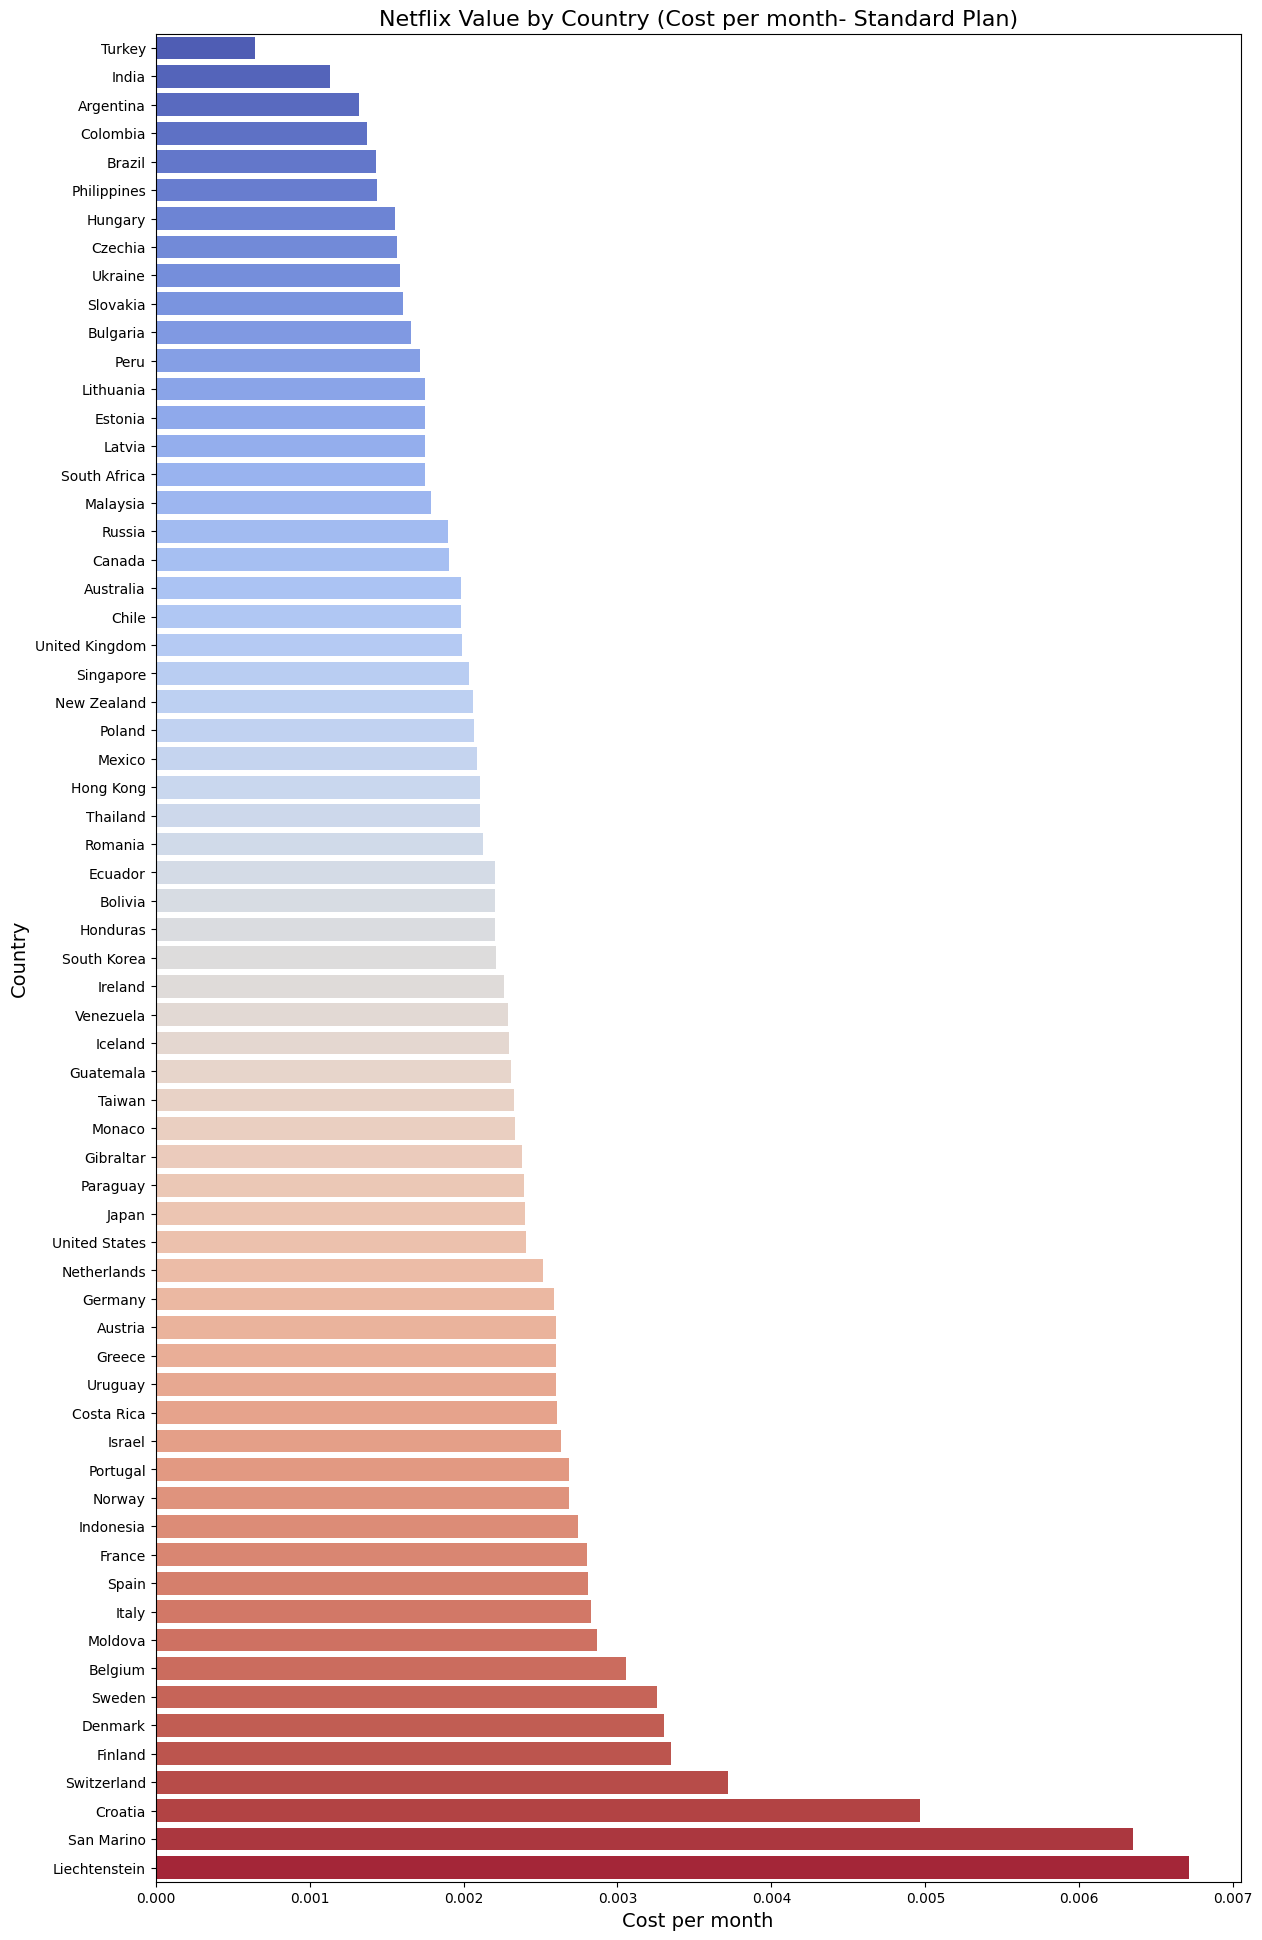

In [183]:
#visualizing for value comparison
plt.figure(figsize = (14,24))
sns.barplot(x = 'Standard_Priceplan', y = 'Country', data = sorted_standard_priceplan , palette = 'coolwarm')
plt.title('Netflix Value by Country (Cost per month- Standard Plan)', fontsize=16)
plt.xlabel('Cost per month', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

In [184]:
#to compare with premium plan
netflix['Premium_Priceplan'] = netflix['Cost Per Month - Premium ($)'] / netflix['Total Library Size']

In [185]:
netflix['Premium_Priceplan'] #value comparison

,Premium_Priceplan
0,0.001945
1,0.002681
2,0.003603
3,0.004072
4,0.002803
...,...
60,0.002116
61,0.002782
62,0.003092
63,0.003205


In [186]:
# total count/sum
netflix['Premium_Priceplan'].sum()

np.float64(0.20152428862131347)

In [187]:
sorted_premium_priceplan = netflix.sort_values(by = 'Premium_Priceplan', ascending = True)

/tmp/ipython-input-3677881165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Premium_Priceplan', y = 'Country', data = sorted_premium_priceplan , palette = 'viridis')


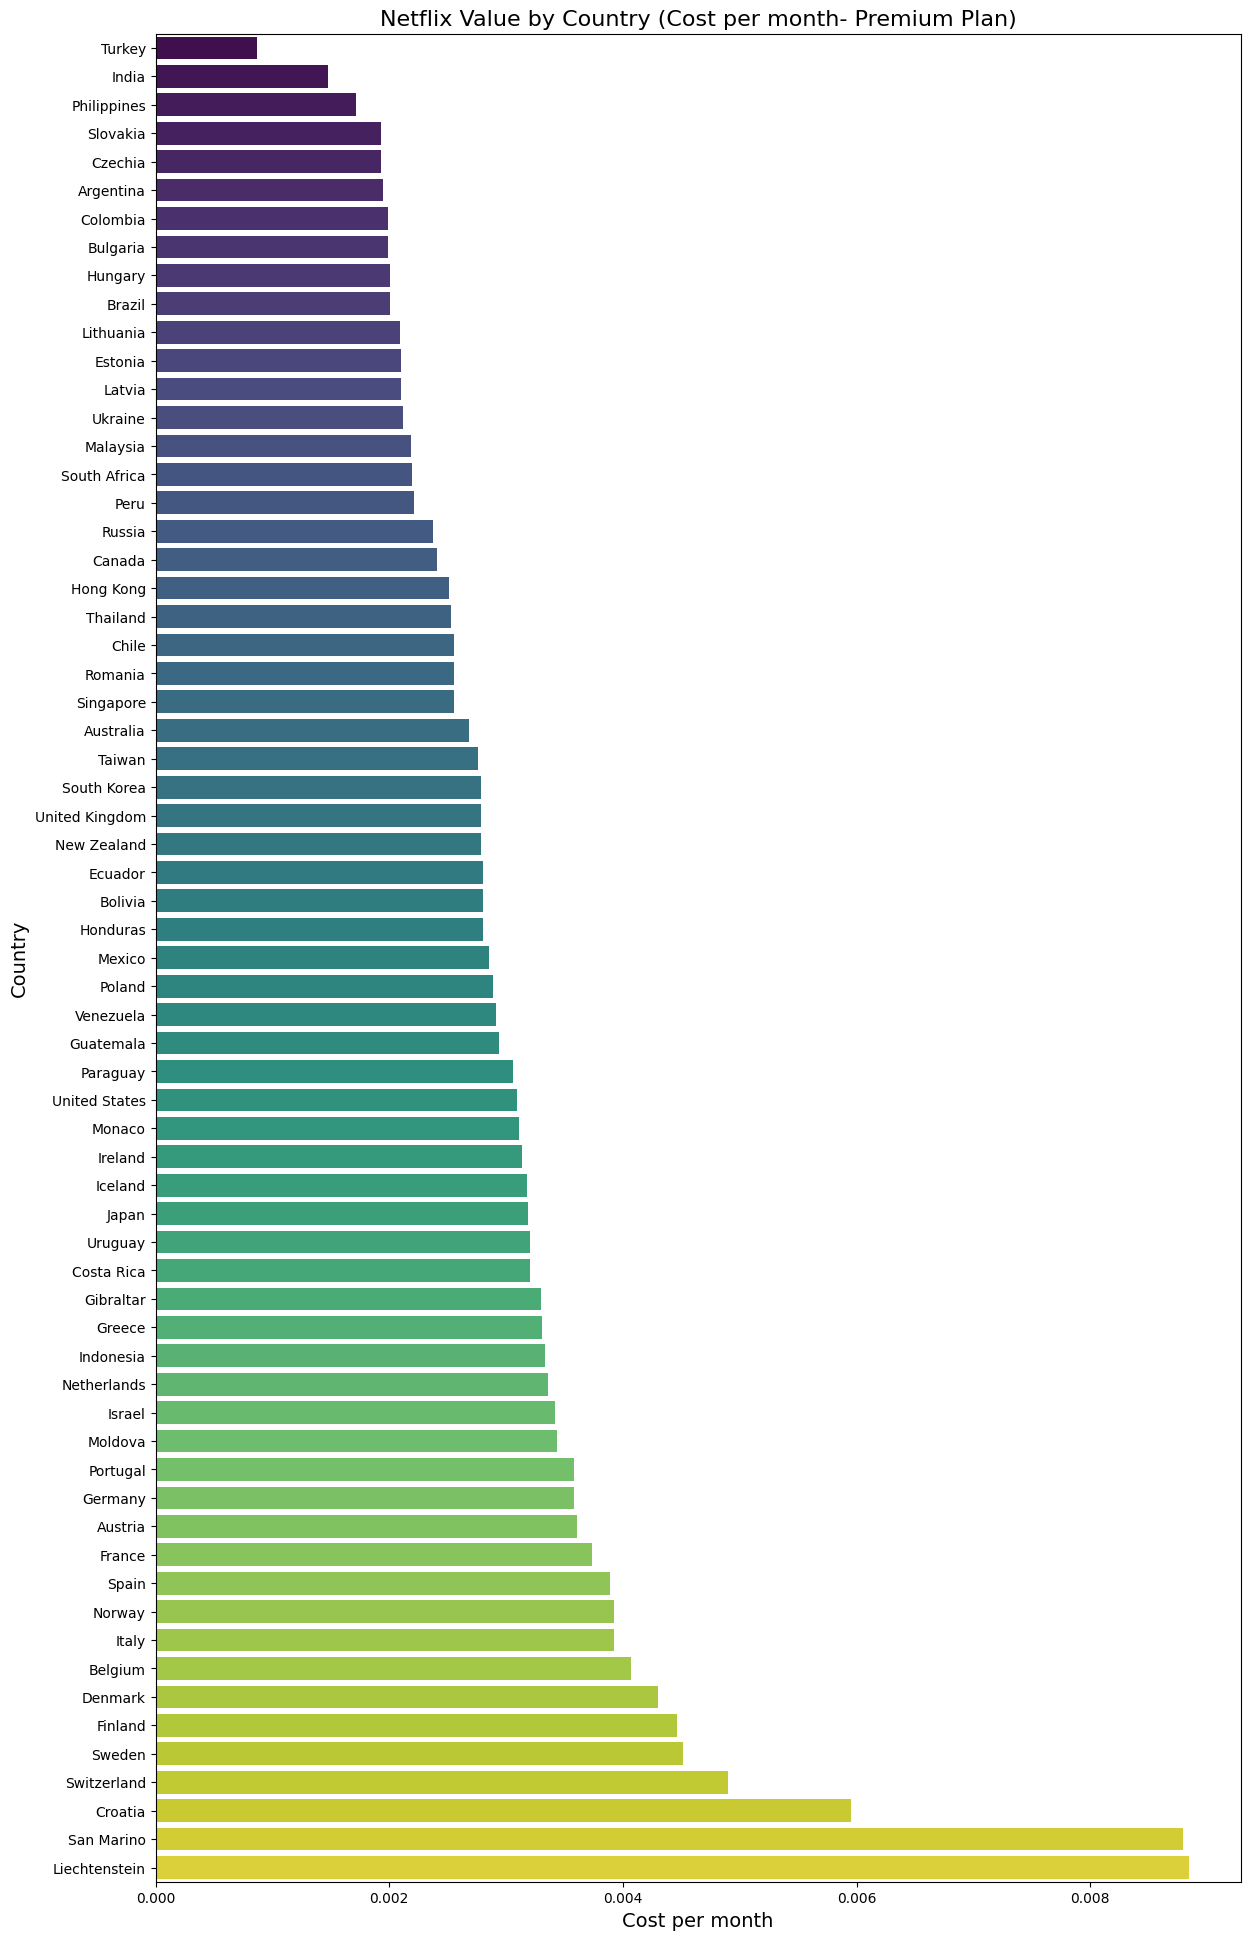

In [188]:
#visualizing
plt.figure(figsize = (14,24))
sns.barplot(x = 'Premium_Priceplan', y = 'Country', data = sorted_premium_priceplan , palette = 'viridis')
plt.xlabel('Cost per month', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Netflix Value by Country (Cost per month- Premium Plan)', fontsize=16)
plt.show()

**Difference between the premium and standard plan**

In [189]:
#as observed premium is expensive than standard
#finding the difference of both plans
netflix['Premium_vs_Standard'] = netflix['Premium_Priceplan'] - netflix['Standard_Priceplan']

In [190]:
netflix['Premium_vs_Standard']

,Premium_vs_Standard
0,0.000622
1,0.000698
2,0.001002
3,0.001018
4,0.000601
...,...
60,0.000530
61,0.000795
62,0.000688
63,0.000601


In [191]:
#total count/sum of premiumvsstandard
netflix['Premium_vs_Standard'].sum()

np.float64(0.046871774150681486)

In [192]:
#sort the values
sorted_premium_vs_standard = netflix.sort_values(by = 'Premium_vs_Standard', ascending = True)

/tmp/ipython-input-4015983244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Premium_vs_Standard', y = 'Country', data = sorted_premium_vs_standard , palette = 'magma')


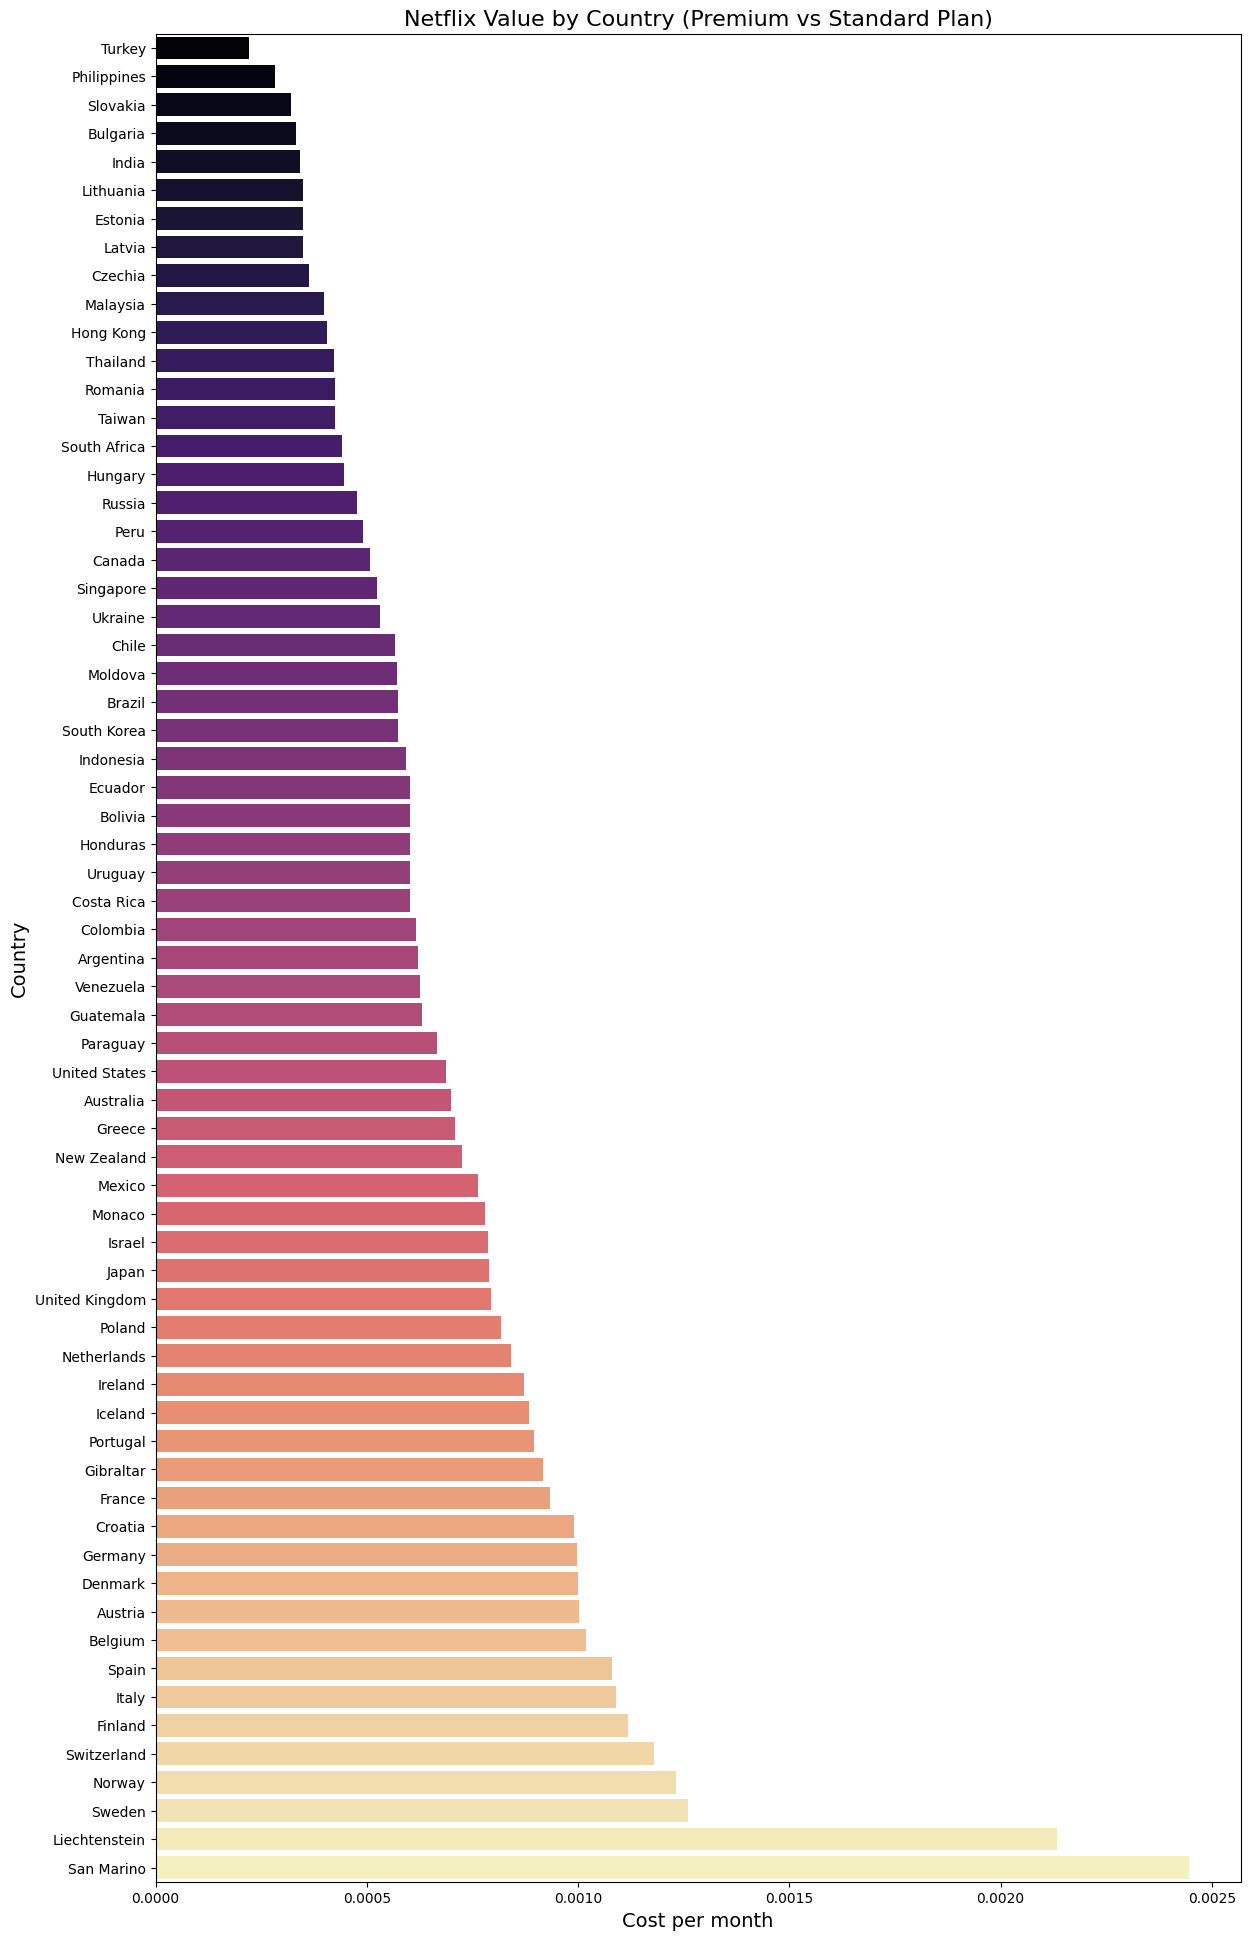

In [193]:
#visualize the differences
plt.figure(figsize = (14,24))
sns.barplot(x = 'Premium_vs_Standard', y = 'Country', data = sorted_premium_vs_standard , palette = 'magma')
plt.xlabel('Cost per month', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Netflix Value by Country (Premium vs Standard Plan)', fontsize=16)
plt.show()

In [194]:
# What I understood from this Analysis:
#Although Premium costs more in most countries, the overall difference in value per title is surprisingly low. In some countries, it’s just a few cents more.
#This shows Netflix maintains relative pricing balance across regions, especially when comparing value per content.

**Region Trends**

In [195]:
region_map = {
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Spain': 'Europe',
    'Russia': 'Europe',
    'India': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'Philippines': 'Asia',
    'Indonesia': 'Asia',
    'Turkey': 'Asia',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
} #only filling 20 rows

In [196]:
#mapping regions to countries
netflix['Region'] = netflix['Country'].map(region_map)

In [197]:
# calculate the regional avg for cost per month both standard and premium
regional_avg_cost = netflix.groupby('Region')[['Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']].mean().reset_index()

<Figure size 1400x800 with 0 Axes>

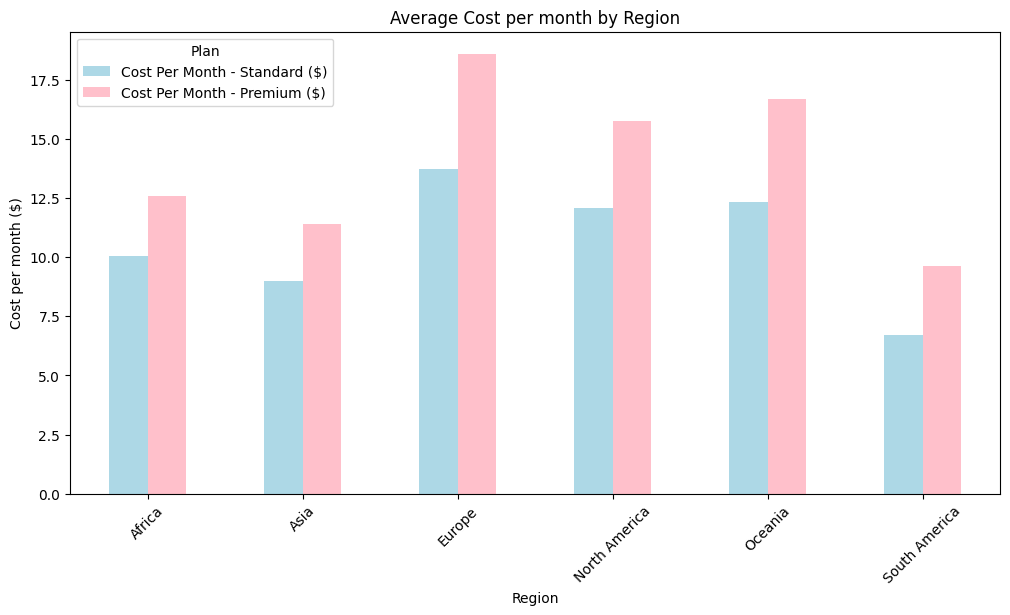

In [198]:
#plotting regional wise
plt.figure(figsize = (14,8))
regional_avg_cost.plot(kind = 'bar', x = 'Region', y=['Cost Per Month - Standard ($)',	'Cost Per Month - Premium ($)'], figsize=(12, 6), color=['lightblue' , 'pink'])
plt.title('Average Cost per month by Region')
plt.ylabel('Cost per month ($)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show()

In [232]:
# we can see that europe has highest avg cost per month maybe cause - Stronger currencies (like Euro or Pound)
# Higher average income levels, Regional pricing strategies & taxes (especially digital VAT)
# overall , we can say that netflix maintains a good pricing strategy where it considers the users - income and other resources